In [2]:
%load_ext autoreload

In [3]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [4]:
%matplotlib inline
#%matplotlib notebook

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')

import pandas as pd
import numpy as np
from IPython.display import HTML, display
import matplotlib

In [16]:
%autoreload

In [6]:
from flora_tools.radio_configuration import RadioConfiguration
from flora_tools.radio_math import RadioMath

df = pd.DataFrame(columns=['modulation_name', 'bandwidth', 'symbol_rate', 'chirp_rate', 'coderate', 'bitrate', 'symbol_time', 'preamble_len', 'preamble_time', 'sensitivity', 'max_toa'])
df.index.name = 'modulation'

for i in range(0, 10):
    config = RadioConfiguration(i)
    math = RadioMath(config)
    df.loc[i] = [config.modulation_name, config.real_bandwidth, config.symbol_rate, config.chirp_rate, config.coderate, config.bitrate, math.get_symbol_time(), config.preamble_len, math.get_preamble_time(), math.sensitivity, math.get_message_toa(payload_size=255)]
    
def colorize(row):
    color = matplotlib.colors.to_hex(RadioConfiguration(row.name).color)
    return ['background-color: {}; color: white;'.format(color) for v in row]
    
df.style.apply(colorize, axis=1).set_precision(9)



,modulation_name,bandwidth,symbol_rate,chirp_rate,coderate,bitrate,symbol_time,preamble_len,preamble_time,sensitivity,max_toa
modulation,,,,,,,,,,,
0,SF12,125000,30.5175781,3814697.27,5,244.140625,0.032768,10,0.466944,-135,9.084928
1,SF11,125000,61.0351562,7629394.53,5,439.453125,0.016384,10,0.233472,-131,5.033984
2,SF10,125000,122.070312,15258789.1,5,976.5625,0.008192,10,0.116736,-130,2.312192
3,SF9,125000,244.140625,30517578.1,5,1757.8125,0.004096,10,0.058368,-127,1.258496
4,SF8,125000,488.28125,61035156.2,5,3125,0.002048,10,0.029184,-124,0.711168
5,SF7,125000,976.5625,122070312,5,5468.75,0.001024,10,0.014592,-122,0.401664
6,SF6,125000,1953.125,244140625,5,9375,0.000512,12,0.009344,-116,0.2336
7,SF5,125000,3906.25,488281250,5,15625,0.000256,12,0.004672,-113,0.13984
8,FSK 125k,234300,15625,nan,None,125000,6.4e-05,2,0.000128,-102,0.016832


## ToA Payload overhead

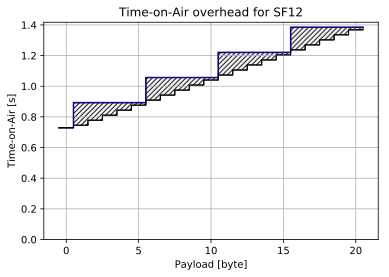

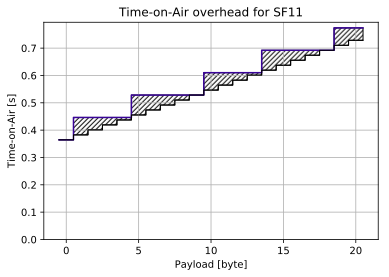

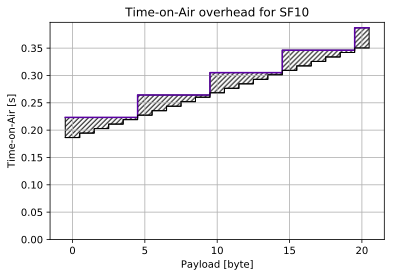

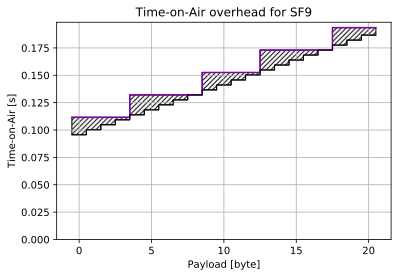

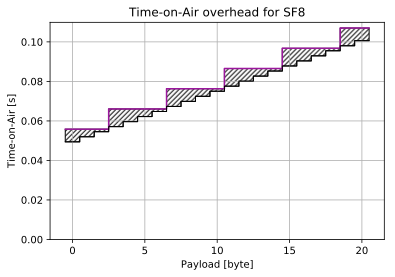

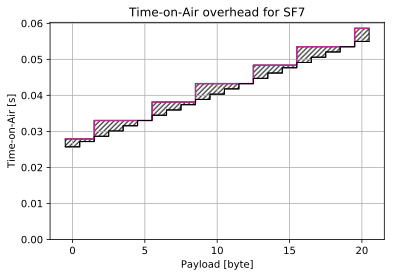

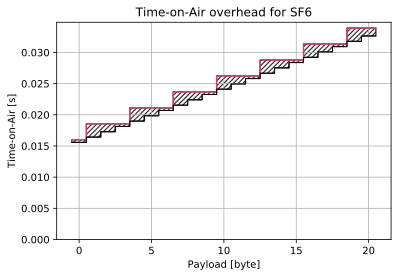

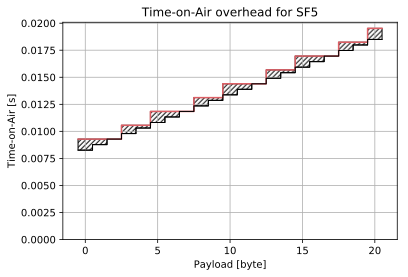

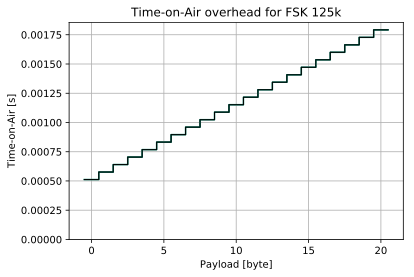

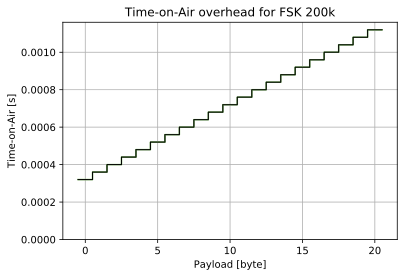

In [68]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'


MAX_PAYLOAD = 21
payloads = np.arange(MAX_PAYLOAD)
offset_payloads = np.insert(payloads, 0, -1) + 0.5

for i in range(10):
    config = RadioConfiguration(i)
    math = RadioMath(config)
    
    toas = [math.get_message_toa(j) for j in payloads]
    toas = np.insert(toas, 0, math.get_message_toa(0))
    
    toas_without_overhead = [math.get_message_toa(j, ceil_overhead=False) for j in payloads]
    toas_without_overhead = np.insert(toas_without_overhead, 0, math.get_message_toa(0, ceil_overhead=False))
    
    plt.step(offset_payloads, toas, c=config.color)
    plt.step(offset_payloads, toas_without_overhead, ":",  c='k', linewidth=1)
    
    plt.xticks(np.arange(0, MAX_PAYLOAD, step=5))
    
    ax = plt.gca()
    ax.grid(True)
    
    plt.ylim(ymin=0)
    
    ax.fill_between(offset_payloads, toas, toas_without_overhead, step='pre', hatch='/////', facecolor="none")
    
    
    plt.title("Time-on-Air overhead for {}".format(config.modulation_name))
    plt.xlabel("Payload [byte]")
    plt.ylabel("Time-on-Air [s]")
    
    plt.show()


## Rx 2 Rf

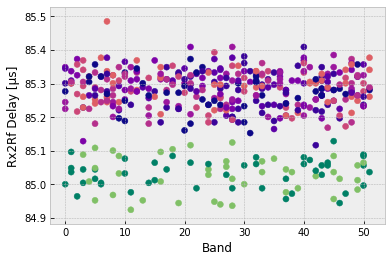

In [6]:
from flora_tools.experiments.measure_time_rx2rf import MeasureTimeRx2Rf

rx2rf = MeasureTimeRx2Rf()
df = pd.read_csv("../../data/{}.csv".format(rx2rf.name), index_col="sample")
mod_delays, band_delays = rx2rf.analyze(df)

In [7]:
%matplotlib inline
mod_delays.style.set_precision(9)

,modulation_name,sample_count,rx2rf,rx2rf_err
modulation,,,,
0,SF12,48,8.52751861e-05,5.19896077e-08
1,SF11,59,8.52740053e-05,5.8270115e-08
2,SF10,44,8.52921256e-05,5.10236986e-08
3,SF9,45,8.52924974e-05,5.57847017e-08
4,SF8,40,8.52851529e-05,5.47513583e-08
5,SF7,44,8.52834892e-05,4.93078306e-08
6,SF6,39,8.52820836e-05,5.69042094e-08
7,SF5,51,8.52937941e-05,5.45332554e-08
8,FSK 125k,47,8.50341269e-05,4.15370425e-08


## Rx 2 Rx Timeout

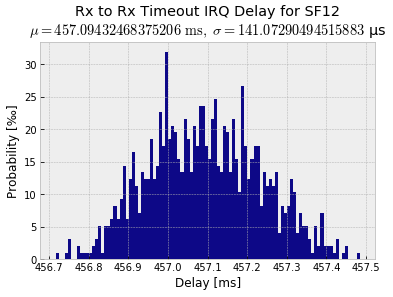

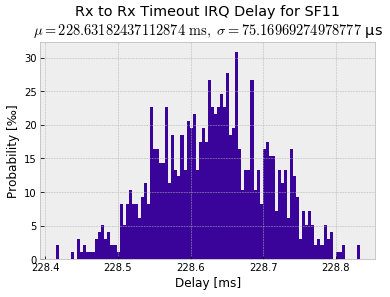

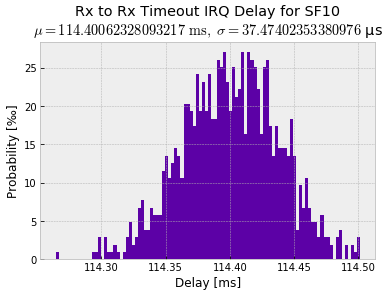

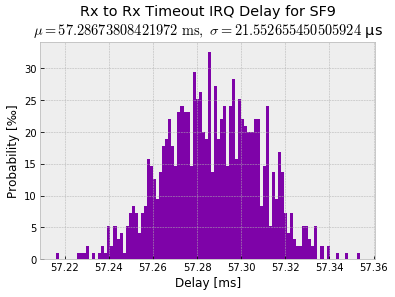

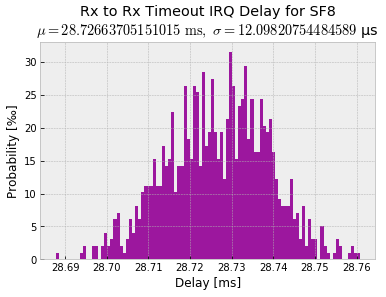

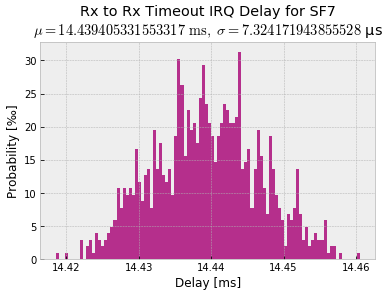

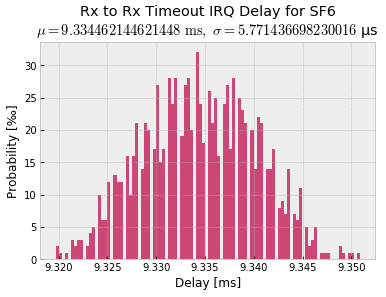

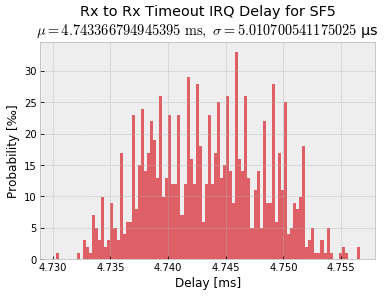

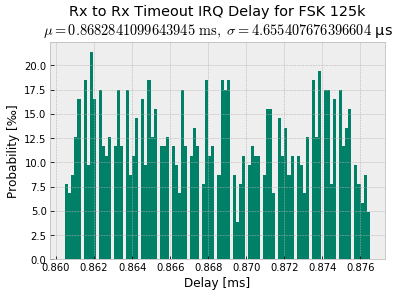

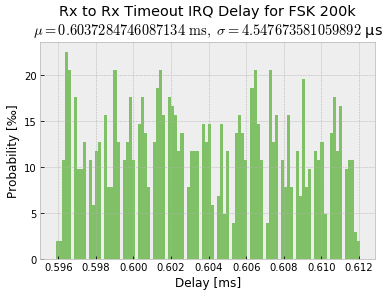

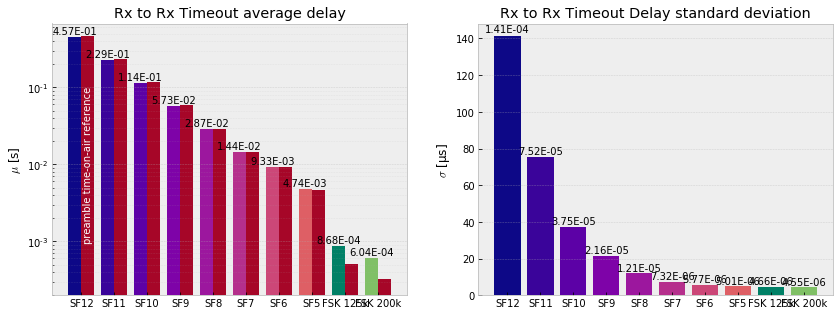

In [8]:
from flora_tools.experiments.measure_time_rx2rxtimeout import MeasureTimeRx2RxTimeout

rx2rxtimeout = MeasureTimeRx2RxTimeout()
df = pd.read_csv("../../data/{}.csv".format(rx2rxtimeout.name), index_col="sample")
delays = rx2rxtimeout.analyze(df)

In [9]:
%matplotlib inline
delays.style.bar(subset=['rx2rxtimeout', 'rx2rxtimeout_err'], color='lightgray').set_precision(9)

,modulation_name,sample_count,rx2rxtimeout_ref,rx2rxtimeout,rx2rxtimeout_err
modulation,,,,,
0,SF12,974,0.466944,0.457094325,0.000141072905
1,SF11,974,0.233472,0.228631824,7.51696927e-05
2,SF10,1036,0.116736,0.114400623,3.74740235e-05
3,SF9,953,0.058368,0.0572867381,2.15526555e-05
4,SF8,985,0.029184,0.0287266371,1.20982075e-05
5,SF7,1024,0.014592,0.0144394053,7.32417194e-06
6,SF6,1000,0.009344,0.00933446214,5.7714367e-06
7,SF5,1002,0.004672,0.00474336679,5.01070054e-06
8,FSK 125k,1030,0.000512,0.00086828411,4.65540768e-06


## Tx 2 Rf

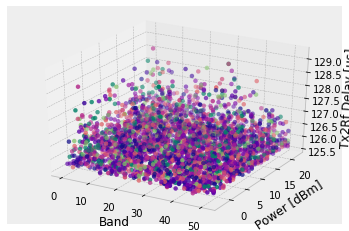

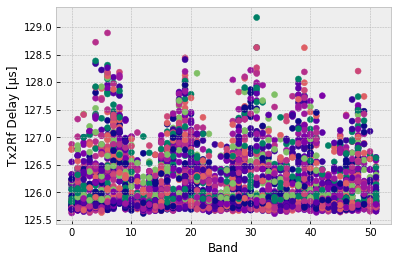

In [10]:
from flora_tools.experiments.measure_time_tx2rf import MeasureTimeTx2Rf
    
tx2rf = MeasureTimeTx2Rf()
df = pd.read_csv("../../data/{}.csv".format(tx2rf.name), index_col="sample")
mod_delays, band_delays = tx2rf.analyze(df)

In [11]:
%matplotlib inline
mod_delays.style.bar(subset=['tx2rf', 'tx2rf_err'], color='lightgray').set_precision(9)

,modulation_name,sample_count,tx2rf,tx2rf_err
modulation,,,,
0,SF12,335,0.000126124808,5.22352101e-07
1,SF11,375,0.000126174776,5.68771994e-07
2,SF10,370,0.000126145305,5.33722921e-07
3,SF9,352,0.000126121579,5.31050993e-07
4,SF8,314,0.000126183975,5.86076788e-07
5,SF7,371,0.000126177984,5.8729947e-07
6,SF6,315,0.000126184424,5.99930588e-07
7,SF5,333,0.000126201346,5.91815838e-07
8,FSK 125k,357,0.000126364995,6.29292616e-07


In [12]:
band_delays.style.bar(subset=['tx2rf', 'tx2rf_err'], color='lightgray').set_precision(9)

,sample_count,tx2rf,tx2rf_err
band,,,
0,65,0.000125959475,2.82259825e-07
1,70,0.000126010689,3.73203316e-07
2,63,0.000126062848,4.27942496e-07
3,64,0.000126126824,4.54088858e-07
4,72,0.000126386819,7.66643061e-07
5,65,0.000126371418,6.0850057e-07
6,73,0.00012670461,8.60682765e-07
7,70,0.000126654352,6.63090658e-07
8,62,0.000126848107,6.09679543e-07


## TX 2 Sync

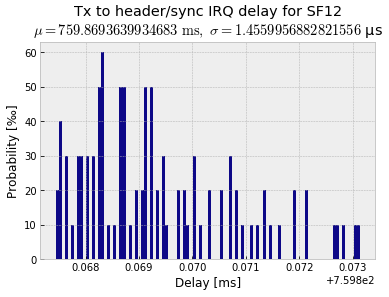

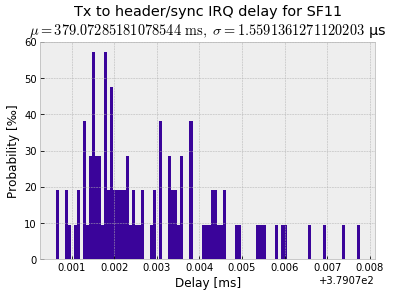

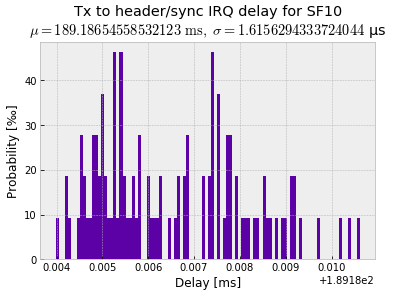

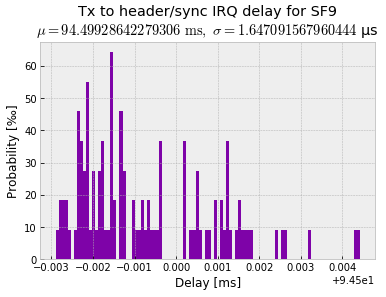

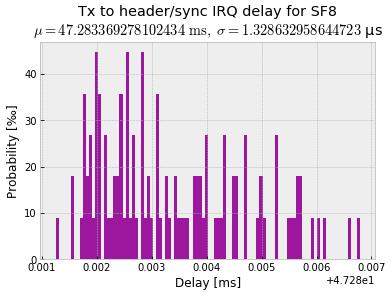

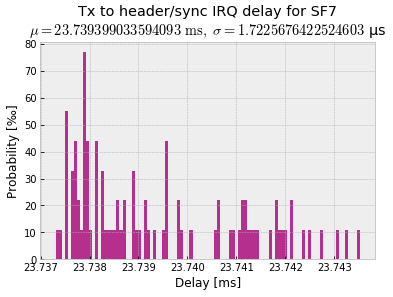

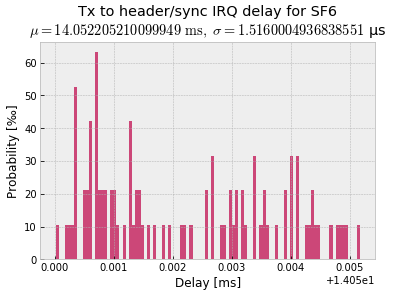

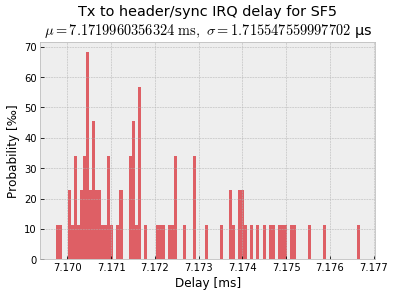

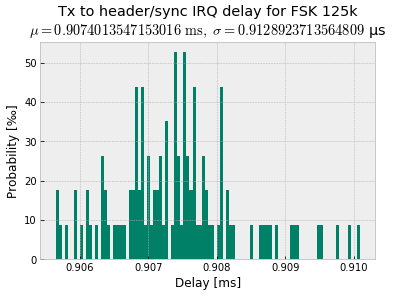

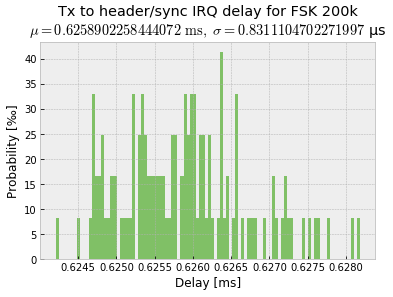

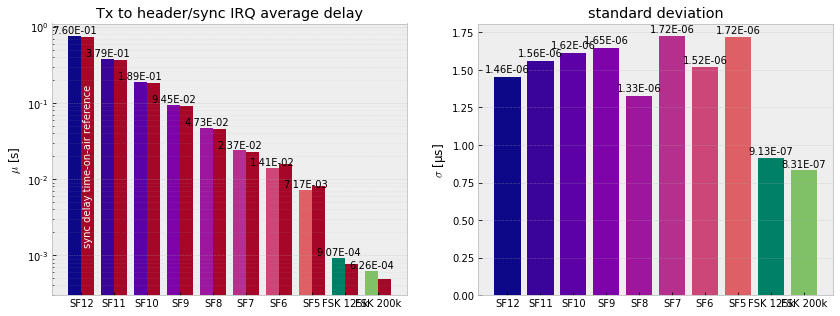

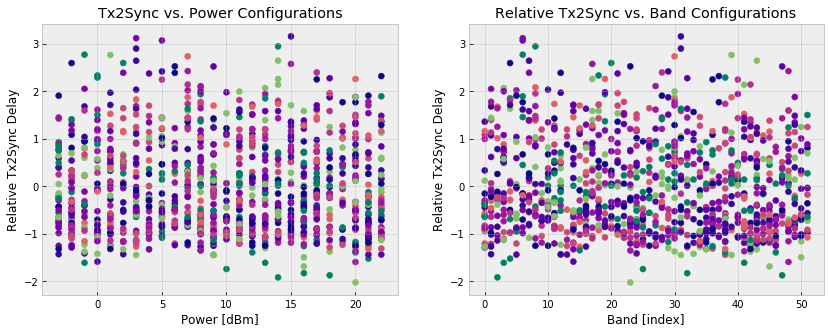

In [24]:
%matplotlib inline

from flora_tools.experiments.measure_time_tx2sync import MeasureTimeTx2Sync
    
txex2sync = MeasureTimeTx2Sync()
df = pd.read_csv("../../data/{}.csv".format(txex2sync.name + "-Preambles_LoRa10_FSK8"), index_col="sample")

delays = txex2sync.analyze(df)

In [23]:
delays.style.bar(subset='total', color='lightgray').set_precision(9)

,modulation_name,sample_count,txex2sync,sync2irq,total,total_err
modulation,,,,,,
0,SF12,100,0.729088,0.030781364,0.759869364,1.45599569e-06
1,SF11,105,0.364544,0.0145288518,0.379072852,1.55913613e-06
2,SF10,108,0.182272,0.00691454559,0.189186546,1.61562943e-06
3,SF9,109,0.091136,0.00336328642,0.0944992864,1.64709157e-06
4,SF8,112,0.045568,0.00171536928,0.0472833693,1.32863296e-06
5,SF7,91,0.022784,0.000955399034,0.023739399,1.72256764e-06
6,SF6,95,0.016,-0.00194779479,0.0140522052,1.51600049e-06
7,SF5,88,0.008,-0.000828003964,0.00717199604,1.71554756e-06
8,FSK 125k,114,0.000768,0.000139401355,0.000907401355,9.12892371e-07


## Tx 2 Tx Done

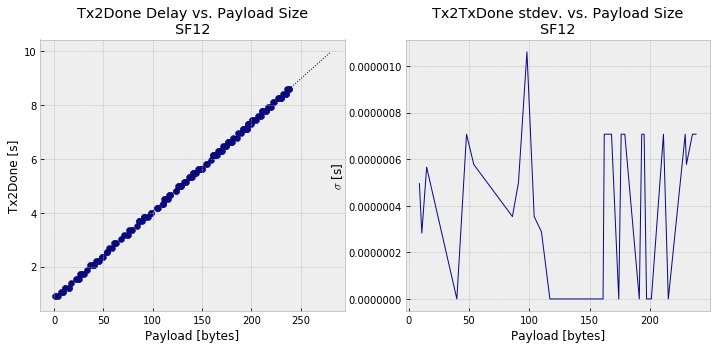

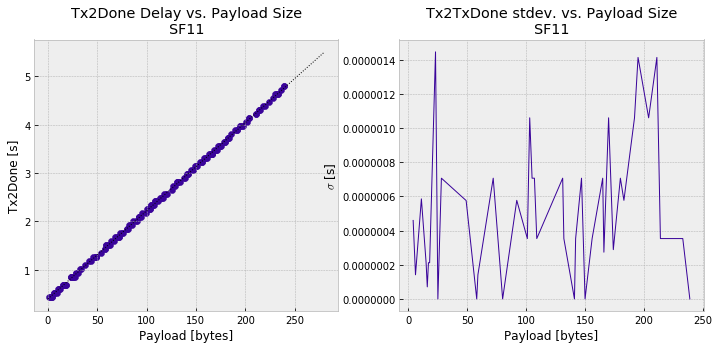

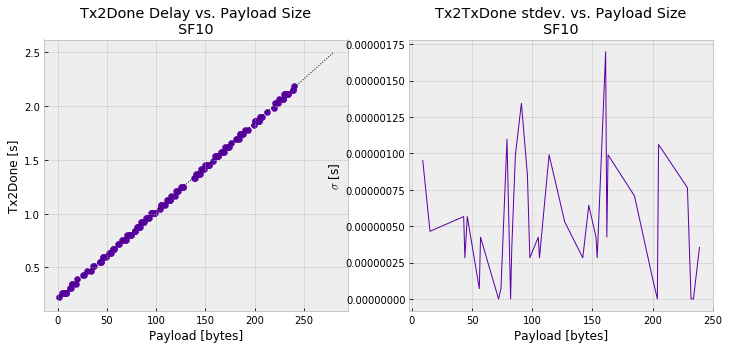

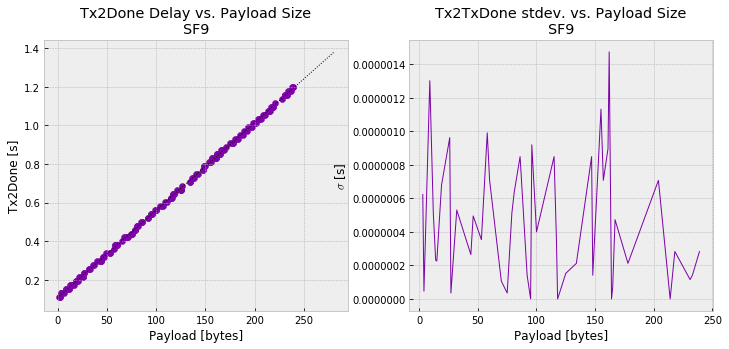

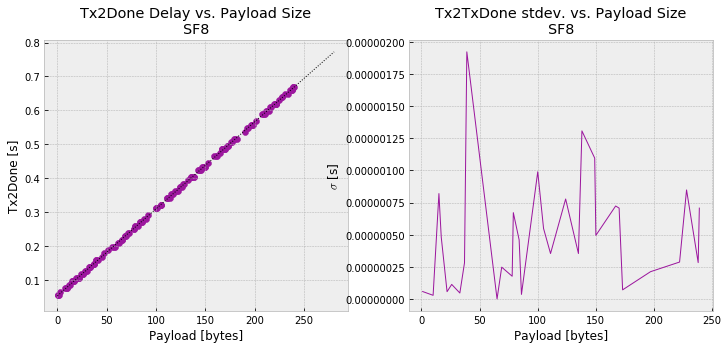

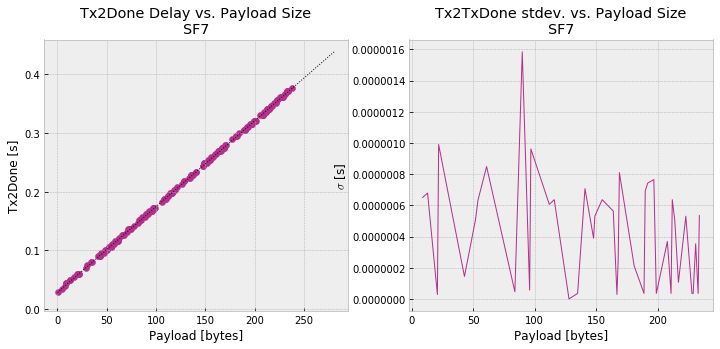

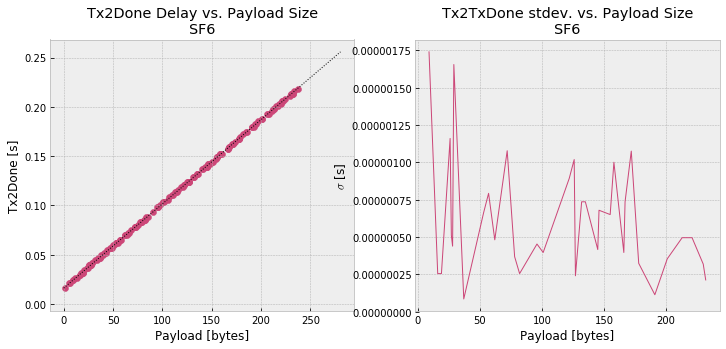

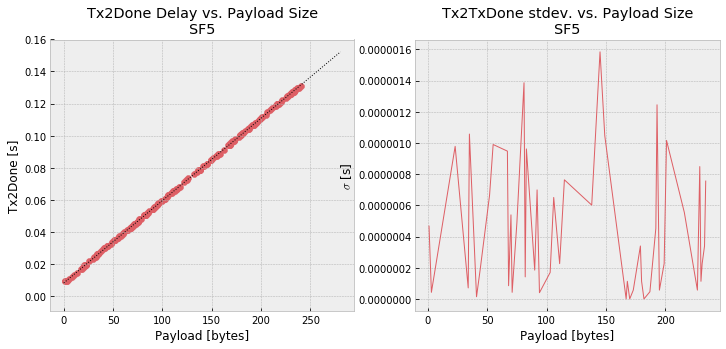

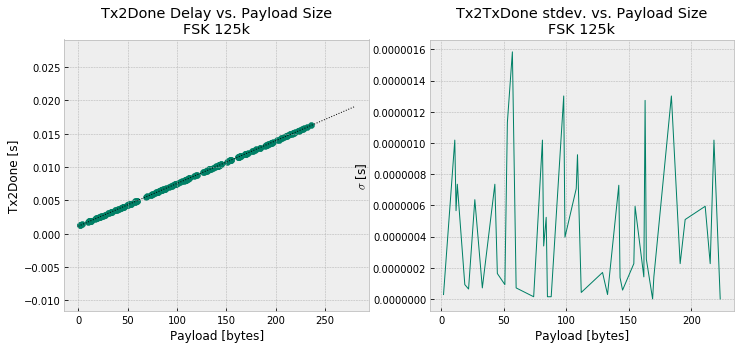

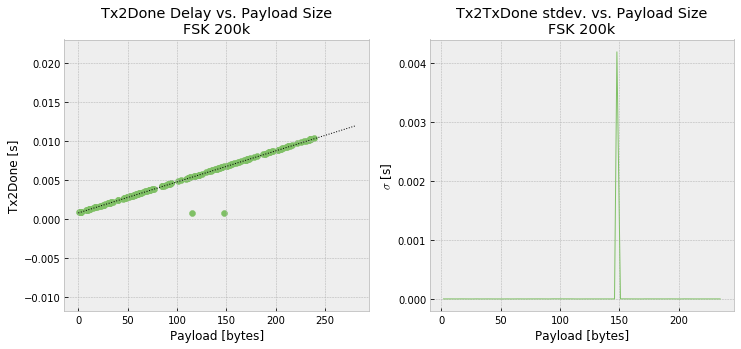

In [15]:
%matplotlib inline

from flora_tools.experiments.measure_time_tx2txdone import MeasureTimeTx2TxDone
    
tx2txdone = MeasureTimeTx2TxDone()
df = pd.read_csv("../../data/{}.csv".format(tx2txdone.name), index_col="sample")
delays = tx2txdone.analyze(df)

In [16]:
delays.style.set_precision(9)

,modulation_name,sample_count,offset,offset_err,m,b,fit_err
modulation,,,,,,,
0,SF12,171,0.000159655472,2.19341468e-05,0.032740839,0.796607741,0.0474179821
1,SF11,182,0.000185396603,1.20819042e-05,0.0181976421,0.399507743,0.0230715137
2,SF10,167,0.000197785791,5.45636711e-06,0.00819077093,0.206459667,0.0119566804
3,SF9,178,0.000203207167,3.22090155e-06,0.00454385812,0.10573953,0.00614640553
4,SF8,154,0.000205997948,1.92824801e-06,0.00256050449,0.0543421286,0.0027447258
5,SF7,179,0.000207365855,1.16018474e-06,0.0014638743,0.0279707703,0.00149763883
6,SF6,168,-0.000583864983,0.00118707245,0.000853947385,0.0162146716,0.000715076886
7,SF5,207,-0.000304386839,0.000628739639,0.000512523536,0.00841160809,0.000362053835
8,FSK 125k,180,0.000244642698,5.99025891e-07,6.39985943e-05,0.00114080449,5.91718226e-07


## Tx 2 Tx Done Implicit

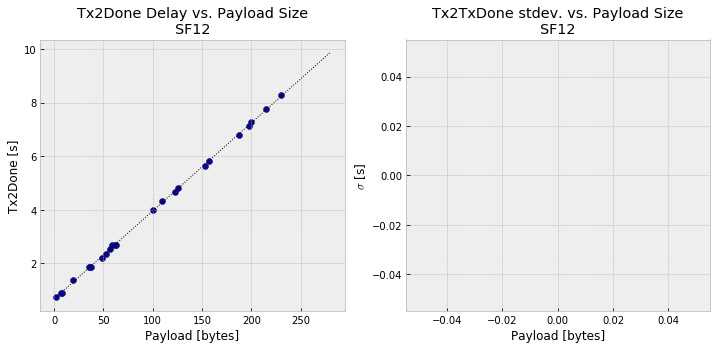

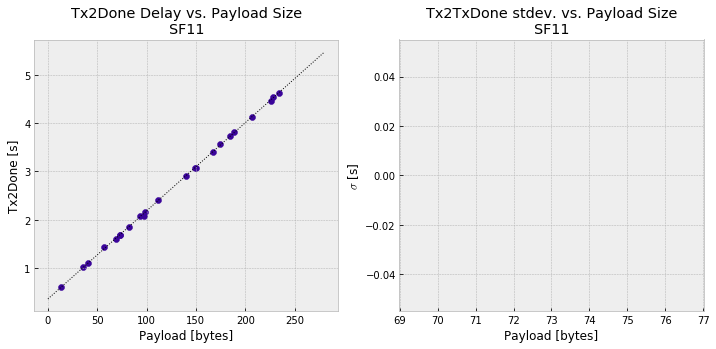

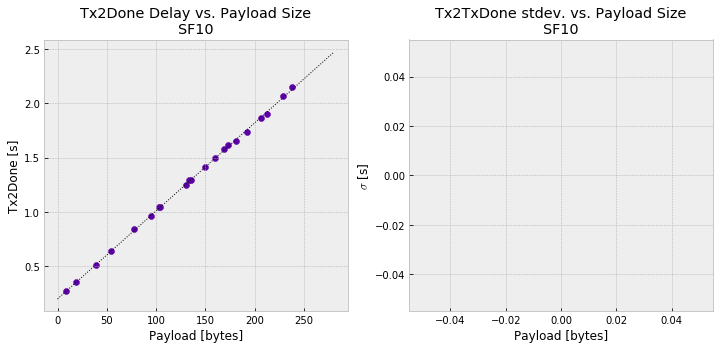

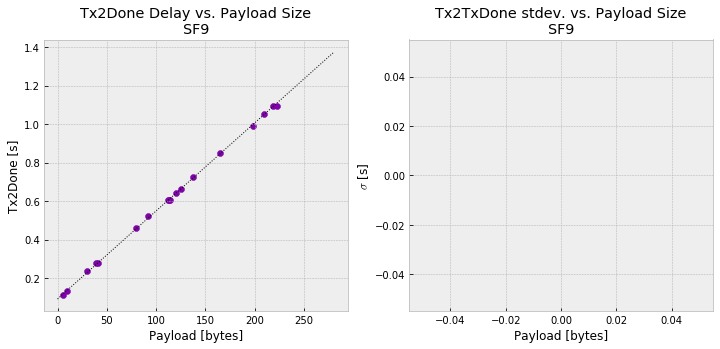

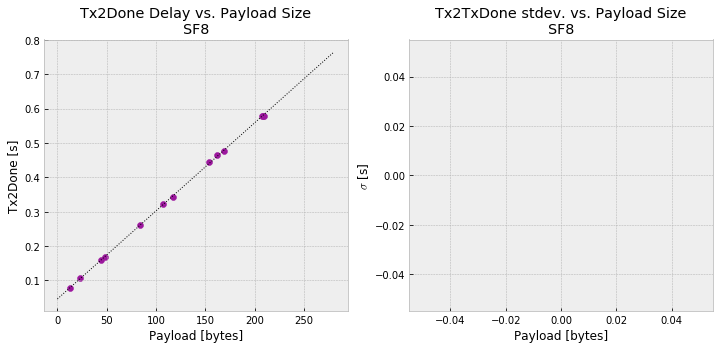

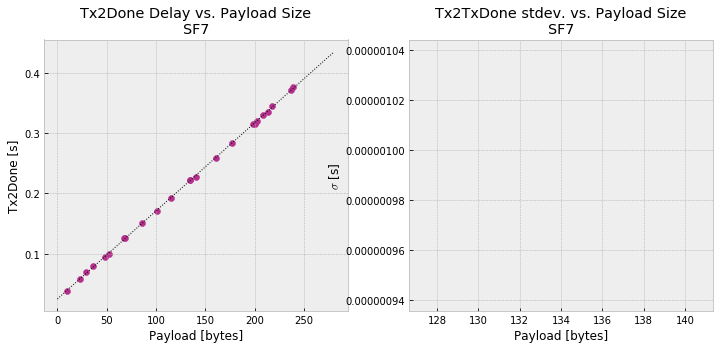

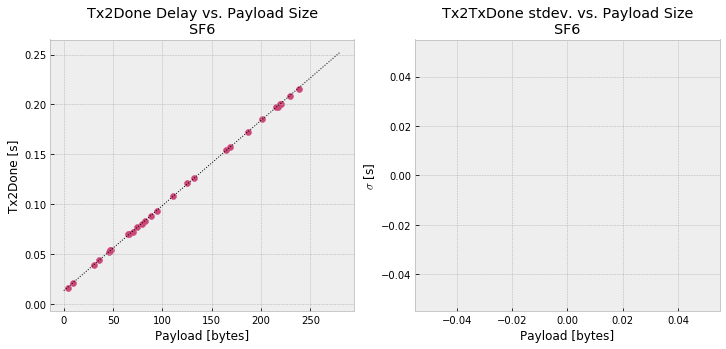

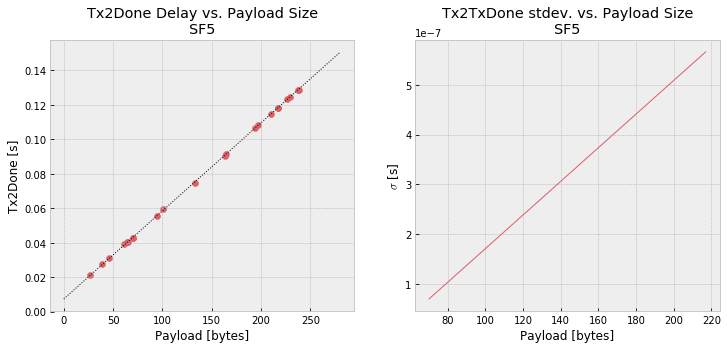

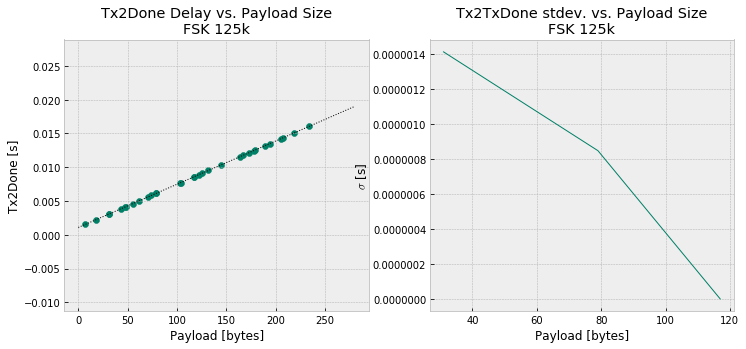

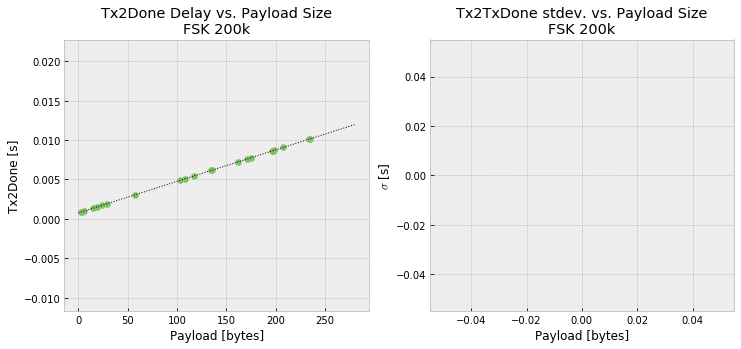

In [17]:
%matplotlib inline

from flora_tools.experiments.measure_time_tx2txdone_implicit import MeasureTimeTx2TxDoneImplicit
    
tx2txdone_implicit = MeasureTimeTx2TxDoneImplicit()
df = pd.read_csv("../../data/{}.csv".format(tx2txdone_implicit.name), index_col="sample")
delays = tx2txdone_implicit.analyze(df)

In [18]:
delays.style.set_precision(9)

,modulation_name,sample_count,offset,offset_err,m,b,fit_err
modulation,,,,,,,
0,SF12,24,-0.109049866,0.0788902575,0.032850269,0.675014201,0.0468742377
1,SF11,23,-0.0425534993,0.0418400386,0.0182276255,0.358649612,0.0196539356
2,SF10,21,-0.0173544397,0.0207721189,0.00813860478,0.19390514,0.00958411822
3,SF9,18,-0.00889627868,0.0104712689,0.00457698037,0.0914571027,0.00641532137
4,SF8,13,-0.00845619075,0.00384478588,0.00256430378,0.0458557059,0.00277786251
5,SF7,24,-0.00320375875,0.00246535589,0.00146231672,0.0249528579,0.00136203818
6,SF6,28,-0.00353802282,0.00130026146,0.000852883851,0.0134896281,0.000681381998
7,SF5,22,-0.00153456291,0.000630319972,0.000511365374,0.00729852157,0.000340323828
8,FSK 125k,32,0.000182870759,6.2792349e-07,6.39972259e-05,0.00107919324,6.00927186e-07


## Tx 2 Rx Done

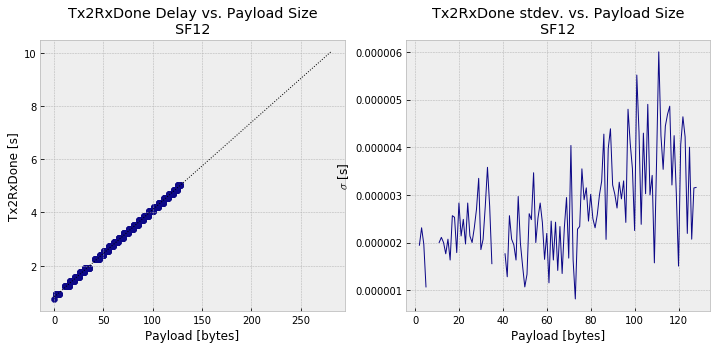

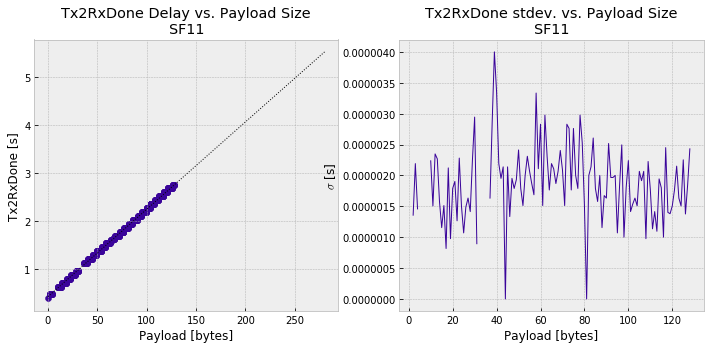

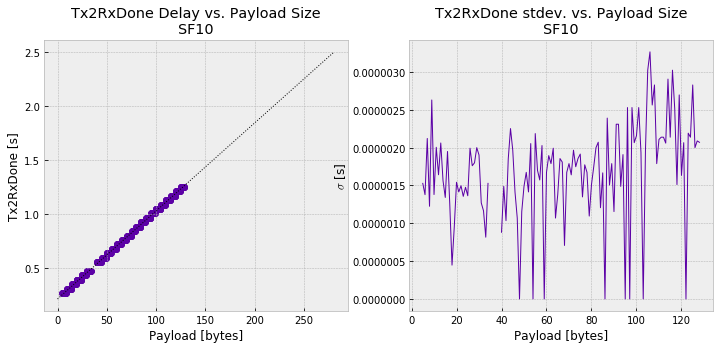

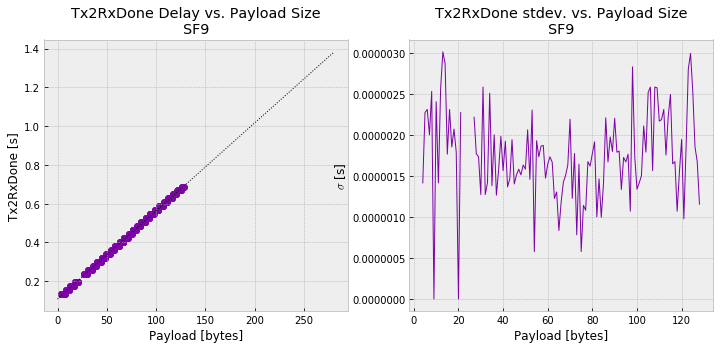

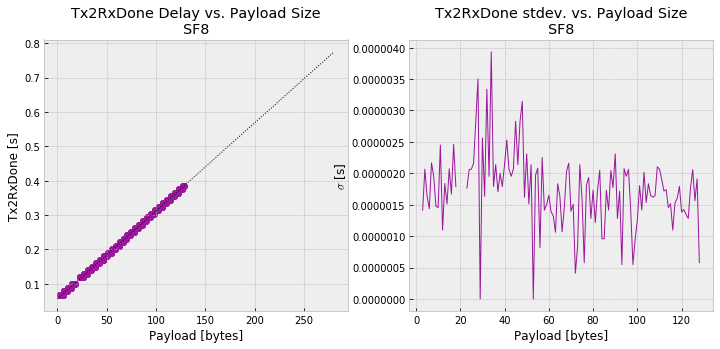

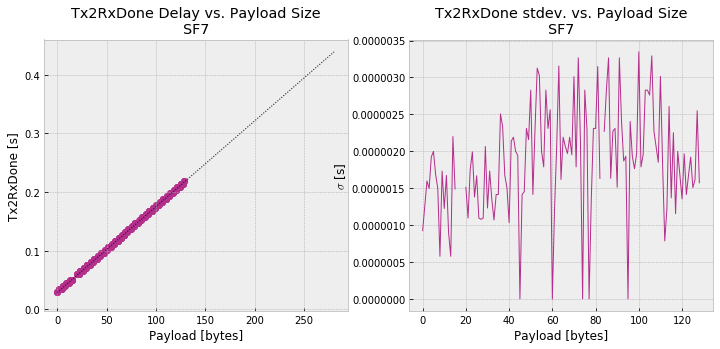

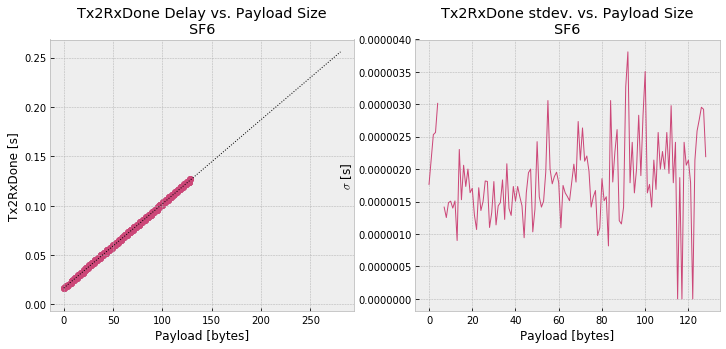

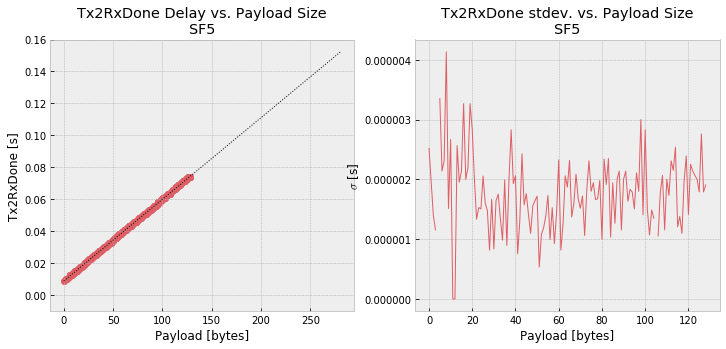

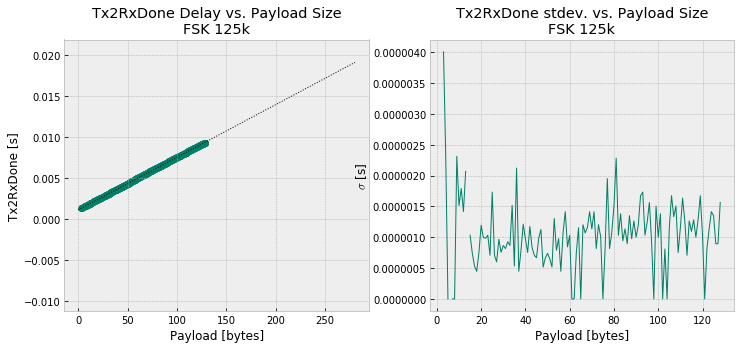

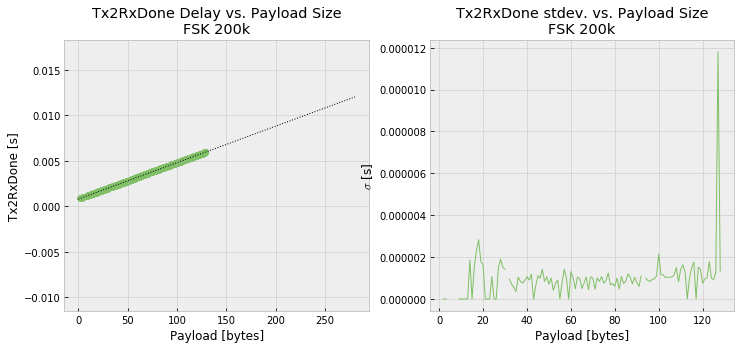

In [19]:
%matplotlib inline

from flora_tools.experiments.measure_time_tx2rxdone import MeasureTimeTx2RxDone
    
tx2rxdone = MeasureTimeTx2RxDone()
df = pd.read_csv("../../data/{}.csv".format(tx2rxdone.name), index_col="sample")
delays = tx2rxdone.analyze(df)

In [20]:
delays.style.set_precision(9)

,modulation_name,sample_count,offset,offset_err,m,b,fit_err
modulation,,,,,,,
0,SF12,889,0.030750027,5.72681319e-05,0.0328249093,0.822548731,0.0449936101
1,SF11,914,0.014506505,5.27205727e-05,0.0182009316,0.415528353,0.0234859785
2,SF10,909,0.00696208142,5.51586791e-05,0.00816322635,0.215921845,0.0112213433
3,SF9,961,0.00338376782,5.097117e-05,0.00454440474,0.108435157,0.00573568033
4,SF8,965,0.00169961475,4.50018774e-05,0.0025616022,0.0561279203,0.00282875128
5,SF7,945,0.000931253966,3.95522398e-05,0.00146095657,0.0290119797,0.00140752834
6,SF6,996,-0.000335573116,0.00119309151,0.000852757029,0.0165864071,0.000673340694
7,SF5,959,-0.000107953369,0.000601696006,0.000512031544,0.00865584891,0.000341745266
8,FSK 125k,954,0.00024454374,1.17401692e-06,6.40008575e-05,0.00114048597,1.17363816e-06


## Tx 2 Rx Done Implicit

In [21]:
%matplotlib inline

from flora_tools.experiments.measure_time_tx2rxdone_implicit import MeasureTimeTx2RxDoneImplicit
    
tx2rxdone_implicit = MeasureTimeTx2RxDoneImplicit()
df = pd.read_csv("../../{}.csv".format(tx2rxdone_implicit.name), index_col="sample")
delays = tx2rxdone_implicit.analyze(df)

FileNotFoundError: File b'../../MeasureTimeTx2RxDoneImplicit.csv' does not exist

In [ ]:
delays.style.set_precision(9)

## CAD 2 Done

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_cad2done import MeasureTimeCAD2Done

cad2done = MeasureTimeCAD2Done()
df = pd.read_csv("../../data/{}.csv".format(cad2done.name), index_col="sample")
(delays_detected, delays_nodetection) = cad2done.analyze(df)

In [ ]:
delays_detected.style.bar(subset='cad2done', color='lightgray').set_precision(9)

In [ ]:
delays_nodetection.style.bar(subset='cad2done', color='lightgray').set_precision(9)

## Listen/Sniff Mode Timings

In [ ]:
%autoreload
%matplotlib inline

from experiments.measure_time_sniff_mode import MeasureTimeSniffMode

sniff_mode = MeasureTimeSniffMode()
df = pd.read_csv("../../data/{}.csv".format(sniff_mode.name), index_col="sample")
timings = sniff_mode.analyze(df)

In [ ]:
timings.style.set_precision(9)

## Sleep Mode Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_sleep_mode import MeasureTimeSleepMode

sleep_mode = MeasureTimeSleepMode()
df = pd.read_csv("../../data/{}.csv".format(sleep_mode.name), index_col="sample")
timings = sleep_mode.analyze(df)

In [ ]:
timings.style.set_precision(9)

## Config Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_config import MeasureTimeConfig

time_config = MeasureTimeConfig()
df = pd.read_csv("../../data/{}.csv".format(time_config.name), index_col="sample")
timings = time_config.analyze(df)

In [ ]:
timings.style.set_precision(9)

## Set Payload Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_set_payload import MeasureTimeSetPayload

set_payload = MeasureTimeSetPayload()
df = pd.read_csv("../../data/{}.csv".format(set_payload.name), index_col="sample")
timings = set_payload.analyze(df)

In [ ]:
timings.style.set_precision(9)

## Get Payload Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_get_payload import MeasureTimeGetPayload

get_payload = MeasureTimeGetPayload()
df = pd.read_csv("../../data/{}.csv".format(get_payload.name), index_col="sample")
timings = get_payload.analyze(df)

In [ ]:
timings.style.set_precision(9)

## SetFS Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_set_fs import MeasureTimeSetFS

set_fs = MeasureTimeSetFS()
df = pd.read_csv("../../data/{}.csv".format(set_fs.name), index_col="sample")
timings = set_fs.analyze(df)

In [ ]:
timings.style.set_precision(9)

## Process IRQ Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_irq_process import MeasureTimeIRQProcess

irq_process = MeasureTimeIRQProcess()
df = pd.read_csv("../../data/{}.csv".format(irq_process.name), index_col="sample")
timings = irq_process.analyze(df)

In [ ]:
timings.style.set_precision(9)

## Get Packet Status Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_get_pkt_status import MeasureTimeGetPktStatus

get_pkt_status = MeasureTimeGetPktStatus()
df = pd.read_csv("../../data/{}.csv".format(get_pkt_status.name), index_col="sample")
timings = get_pkt_status.analyze(df)

In [ ]:
timings.style.set_precision(9)

## SetCAD Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_set_cad import MeasureTimeSetCAD

set_cad = MeasureTimeSetCAD()
df = pd.read_csv("../../data/{}.csv".format(set_cad.name), index_col="sample")
timings = set_cad.analyze(df)

In [ ]:
timings.style.set_precision(9)

### CAD Scan Time

In [ ]:
total_time = 0

for i in range(0,8):
    single_time = 6.8620292e-05
    single_time += delays_nodetection.loc[i].cad2done
    single_time += 5.92039801e-05
    total_time += single_time
    
for i in range(8,10):
    config = RadioConfiguration(i, preamble=2, )
    math = RadioMath(config)
    single_time = 7.71854385e-05
    single_time += math.get_symbol_time() * 2
    single_time += 0.000357
    total_time += single_time
    
total_time *= 48
    
display(total_time)

In [ ]:
total_time / 48 / 4

## HS Timer Sync Timings

In [ ]:
%autoreload
%matplotlib inline

from flora_tools.experiments.measure_time_sync import MeasureTimeSync

sync = MeasureTimeSync()
df = pd.read_csv("../../data/{}.csv".format(sync.name), index_col="sample")
timings = sync.analyze(df)

In [ ]:
timings.style.set_precision(9)

## Tx Rx SYNC/HEADER_VALID Sweep

In [ ]:
%autoreload

In [ ]:
%matplotlib inline

from flora_tools.experiments.measure_time_sweep_tx_rx import MeasureTimeSweepTxRx

sweep_tx_rx = MeasureTimeSweepTxRx()
df = pd.read_csv("../../data/{}.csv".format(sweep_tx_rx.name), index_col="sample")
timings = sweep_tx_rx.analyze(df)

## Tx Tx Rx SYNC/HEADER_VALID Sweep

In [ ]:
%autoreload

In [ ]:
%matplotlib inline

In [ ]:
from flora_tools.experiments.measure_time_sweep_tx_tx import MeasureTimeSweepTxTx
import pandas as pd

sweep_tx_tx = MeasureTimeSweepTxTx()
df = pd.read_csv("../../data/{}.csv".format(sweep_tx_tx.name), index_col="sample")
timings = sweep_tx_tx.analyze(df)